In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import warnings
warnings.simplefilter("ignore")
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [2]:
train_transaction = pd.read_csv("/content/drive/MyDrive/train_transaction.csv")
test_transaction = pd.read_csv("/content/drive/MyDrive/test_transaction.csv")


In [3]:
train_identity = pd.read_csv("/content/drive/MyDrive/train_identity.csv")

In [5]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_transaction.shape

(506691, 393)

In [23]:
missing_values = train_transaction.isnull().sum()
# missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with missing values and their counts:")
print(missing_values)

Columns with missing values and their counts:
TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64


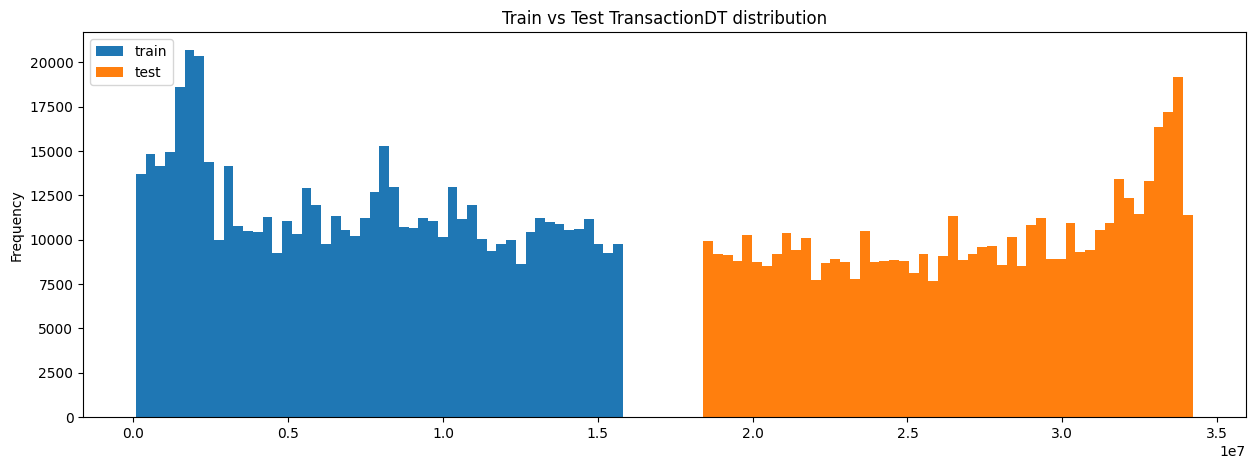

In [ ]:
train_transaction['TransactionDT'].plot(kind = 'hist',
                                  figsize = (15,5),label = 'train',bins = 50,title = "Train vs Test TransactionDT distribution")


test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

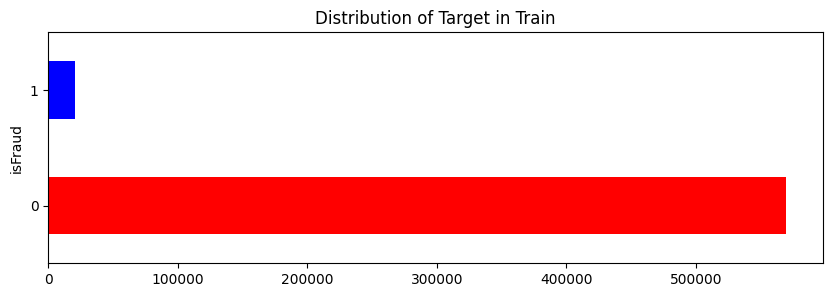

In [ ]:
train_transaction.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribution of Target in Train',
          figsize=(10,3),
          color=['red', 'blue']) # Added color argument
plt.show()

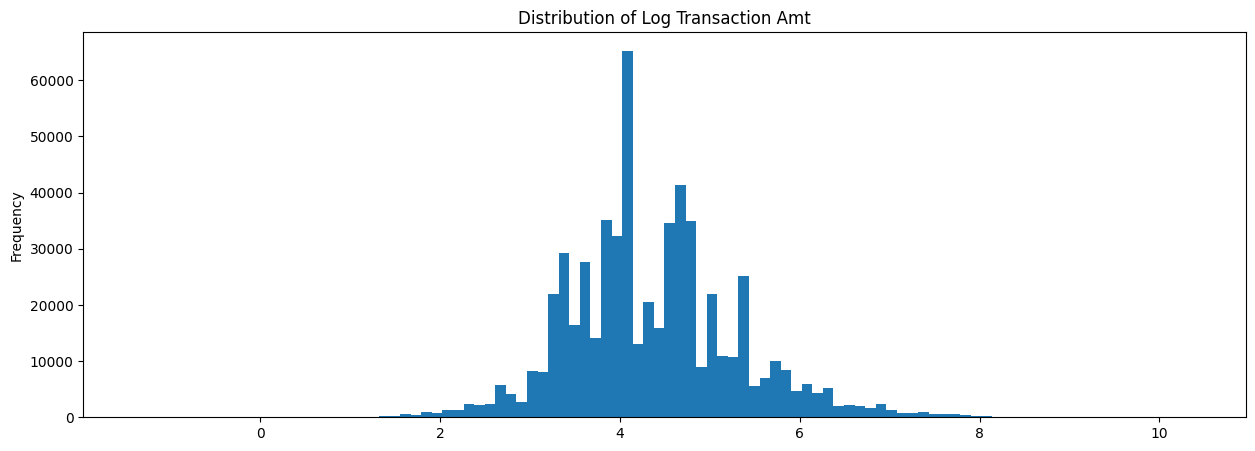

In [ ]:
train_transaction['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribution of Log Transaction Amt')
plt.show()

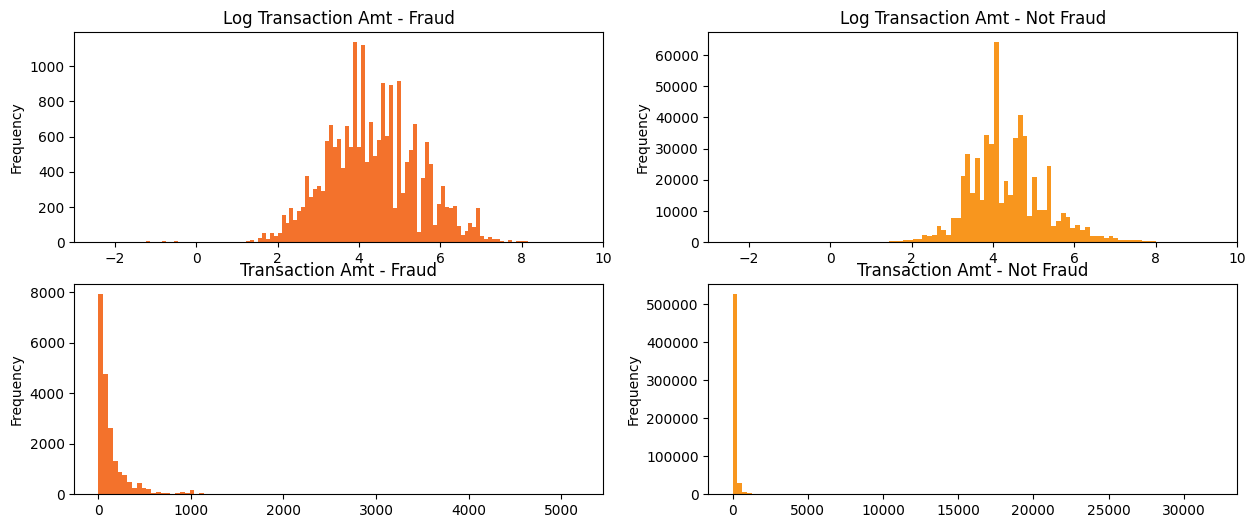

In [ ]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Fraud',
          color=color_pal[1],
          xlim=(-3, 10),
         ax= ax1)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Transaction Amt - Not Fraud',
          color=color_pal[2],
          xlim=(-3, 10),
         ax=ax2)
train_transaction.loc[train_transaction['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Fraud',
          color=color_pal[1],
         ax= ax3)
train_transaction.loc[train_transaction['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='Transaction Amt - Not Fraud',
          color=color_pal[2],
         ax=ax4)
plt.show()

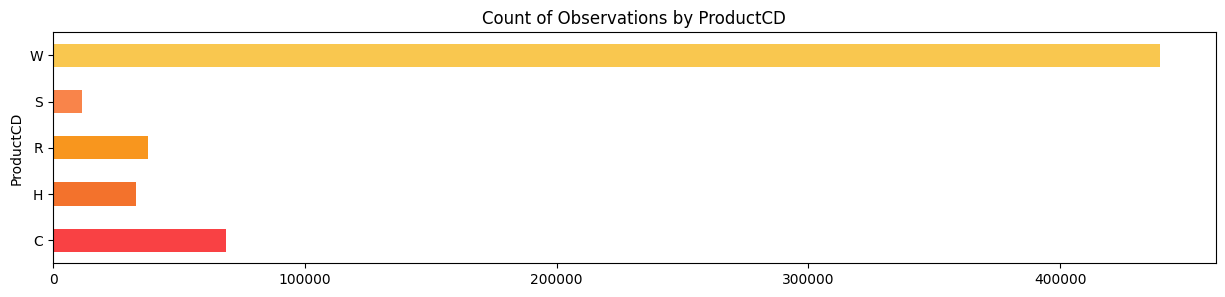

In [ ]:
train_transaction.groupby('ProductCD') \
                          ['TransactionID'].count()\
                          .sort_index() \
                          .plot(kind = 'barh',figsize = (15,3),title='Count of Observations by ProductCD', color=color_pal) # Changed color to use color_pal
plt.show()

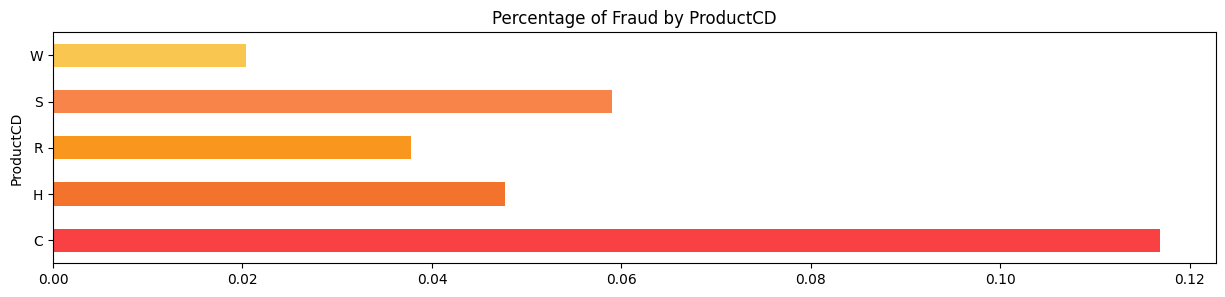

In [ ]:
train_transaction.groupby('ProductCD')['isFraud'] \
    .mean() \
    .sort_index() \
    .plot(kind='barh',
          figsize=(15, 3),
         title='Percentage of Fraud by ProductCD',color = color_pal)
plt.show()

<Axes: title={'center': 'Count of Observations by card4'}, ylabel='card4'>

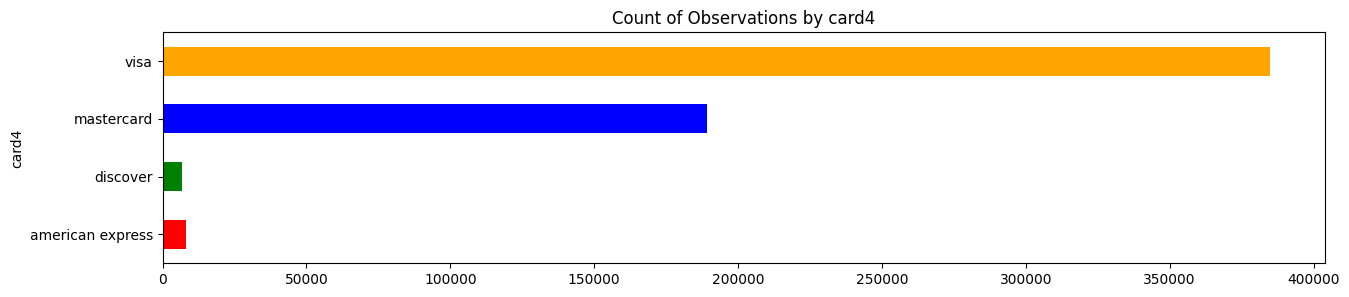

In [14]:
train_transaction.groupby('card4')\
                             ['TransactionID'].count()\
                             .sort_index()\
                             .plot(kind = 'barh',figsize = (15,3),title='Count of Observations by card4', color = ['red', 'green', 'blue', 'orange'])

<Axes: title={'center': 'Count of Observations by card4'}, ylabel='card6'>

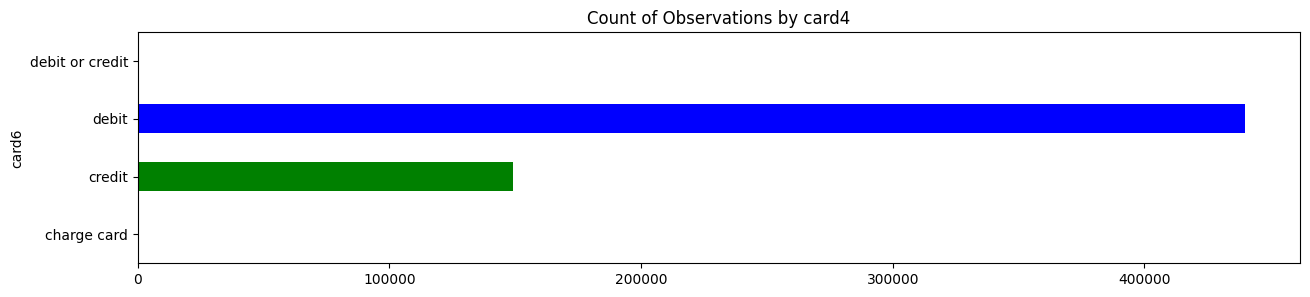

In [15]:
train_transaction.groupby('card6')\
                             ['TransactionID'].count()\
                             .sort_index()\
                             .plot(kind = 'barh',figsize = (15,3),title='Count of Observations by card4', color = ['red', 'green', 'blue', 'orange'])

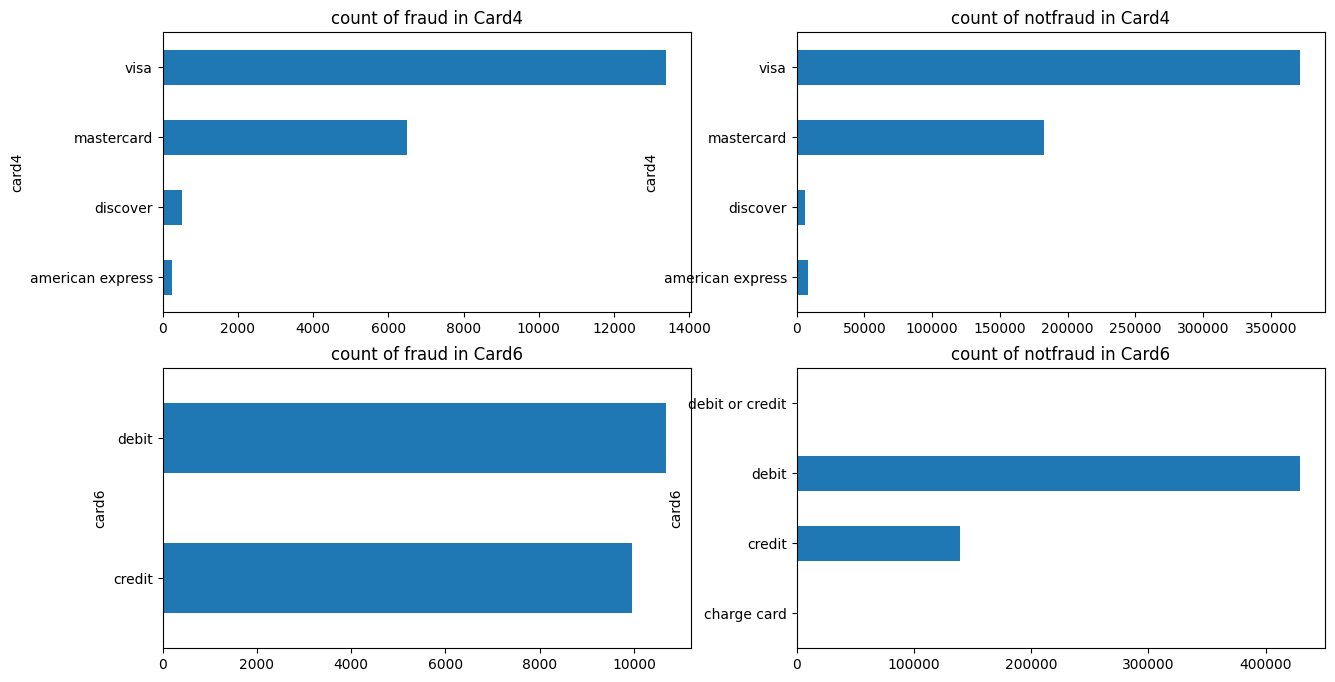

In [18]:
train_transaction_fr = train_transaction.loc[train_transaction['isFraud'] == 1]
train_transaction_nofr = train_transaction.loc[train_transaction['isFraud'] == 0]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

train_transaction_fr.groupby('card4')['card4'].count().plot(kind = 'barh',ax=ax1,title = 'count of fraud in Card4')
train_transaction_nofr.groupby('card4')['card4'].count().plot(kind = 'barh',ax=ax2,title = 'count of notfraud in Card4')

train_transaction_fr.groupby('card6')['card6'].count().plot(kind = 'barh',ax=ax3,title = 'count of fraud in Card6')
train_transaction_nofr.groupby('card6')['card6'].count().plot(kind = 'barh',ax=ax4,title = 'count of notfraud in Card6')

plt.show()



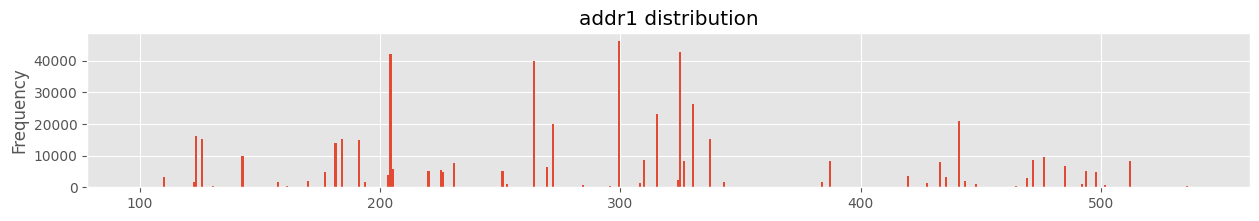

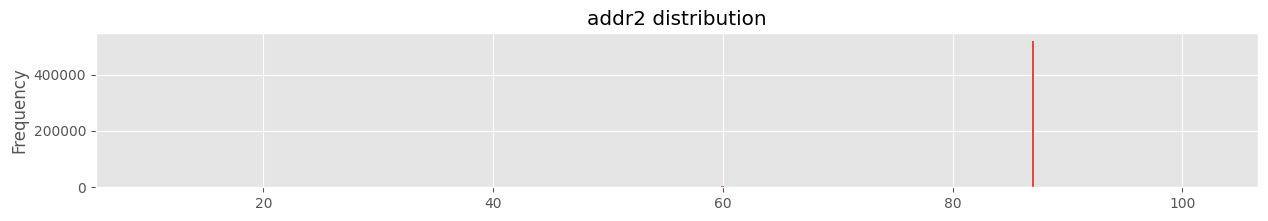

In [31]:
train_transaction['addr1'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr1 distribution')
plt.show()
train_transaction['addr2'].plot(kind='hist', bins=500, figsize=(15, 2), title='addr2 distribution')
plt.show()

# IDENTITY

In [8]:
# Add the `isFraud` column for analysis
train_identity_ = train_identity.merge(train_transaction[['TransactionID',
                                                         'TransactionDT',
                                                         'isFraud']],
                                      on=['TransactionID'])



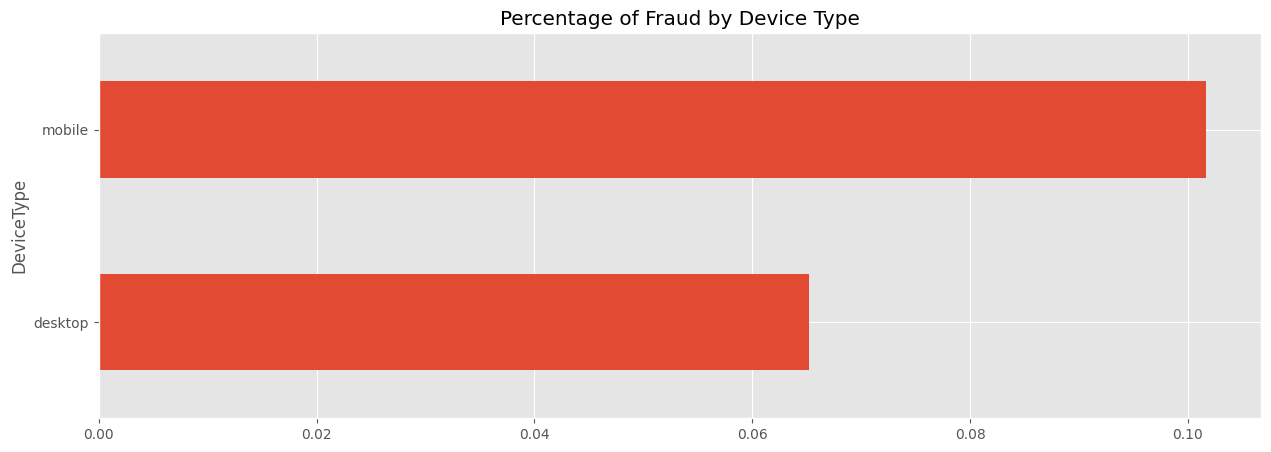

In [28]:
train_identity_.groupby('DeviceType')['isFraud'] \
    .mean() \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()


<Axes: title={'center': 'Top 20 devices in train'}, ylabel='DeviceInfo'>

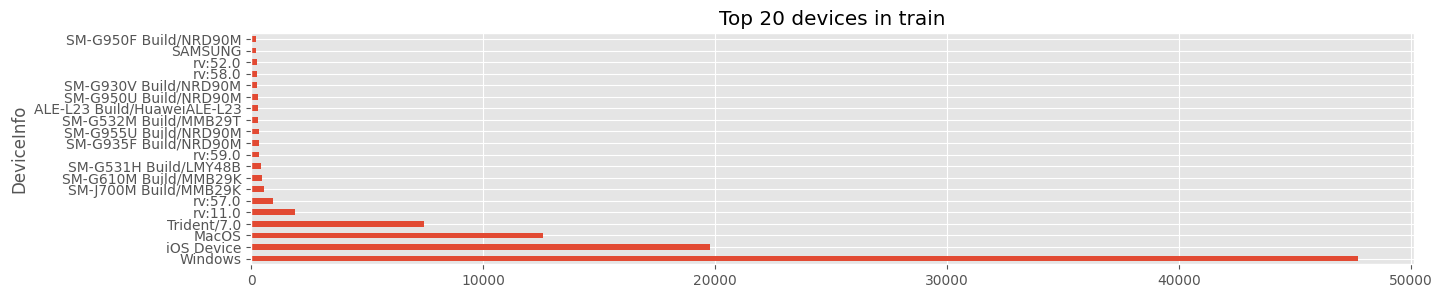

In [9]:
train_identity.groupby('DeviceInfo')\
                      .count()['TransactionID']\
                      .sort_values(ascending=False)\
                      .head(20)\
                      .plot (kind = 'barh',figsize = (15,3),title = 'Top 20 devices in train')

<Axes: title={'center': 'Count of Observations by DeviceType'}, ylabel='DeviceType'>

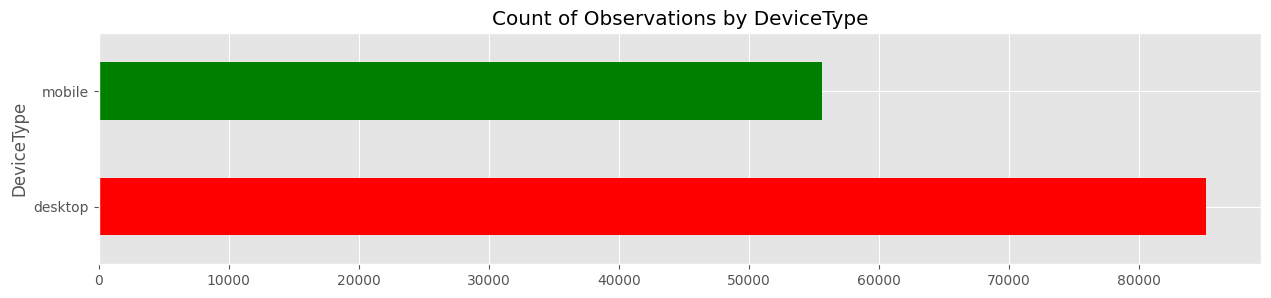

In [5]:
train_identity.groupby('DeviceType')\
                             ['TransactionID'].count()\
                             .sort_index()\
                             .plot(kind = 'barh',figsize = (15,3),title='Count of Observations by DeviceType', color = ['red', 'green'])